Michael Muschitiello // Monte-Carlo Simulation

- This notebook reads in monthly S&P 500 returns from a CSV file, cleans the data by removing the '%' sign and converting it to decimals, and then sorts the values. It compares the empirical distribution to a normal distribution by plotting both the CDF and PDF, and it performs a Kolmogorov–Smirnov test to determine whether the distribution is significantly different from normal. The results suggest that we fail to reject the null hypothesis of normality. 

In [1]:
import numpy as np
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
returns = pd.read_csv('sp500_monthly_returns_2017_2021.csv')
returns.head()

,Date,Value
0,31-Dec-21,4.36%
1,30-Nov-21,-0.83%
2,31-Oct-21,6.91%
3,30-Sep-21,-4.76%
4,31-Aug-21,2.90%


In [3]:
rets_array = returns['Value'].values
rets_array[:5]

array(['4.36%', '-0.83%', '6.91%', '-4.76%', '2.90%'], dtype=object)

In [4]:
rets_array = rets_array.astype(str)
rets_array[:5]

array(['4.36%', '-0.83%', '6.91%', '-4.76%', '2.90%'], dtype='<U7')

In [5]:
rets_array = np.char.replace(rets_array, '%', '').astype(float)
rets_array[:5]

array([ 4.36, -0.83,  6.91, -4.76,  2.9 ])

In [6]:
rets_array/=100
rets_array[:5]

array([ 0.0436, -0.0083,  0.0691, -0.0476,  0.029 ])

In [7]:
rets_array = np.sort(rets_array)
rets_array[:5]

array([-0.1251, -0.0918, -0.0841, -0.0694, -0.0658])

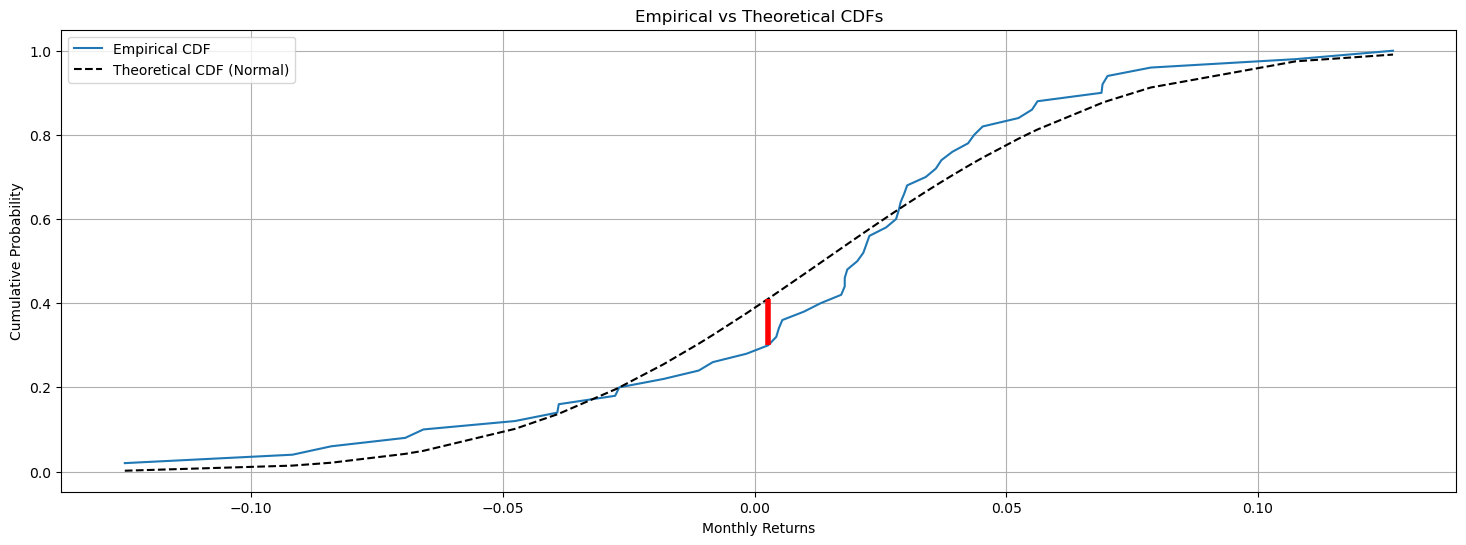

In [8]:
#define N
N = len(rets_array)

#compute the empirical CDF
ecdf = np.arange(1, N+1) / N

# generate the theoretical cdf
mu = np.mean(rets_array)
sigma = np.std(rets_array)
tcdf = stats.norm.cdf(rets_array, mu, sigma)

#plot the ecdf and tcdf
fig = plt.figure(figsize = (18,6))
plt.plot(rets_array, ecdf, label = 'Empirical CDF')
plt.plot(rets_array, tcdf, "k--", label = "Theoretical CDF (Normal)")
D = abs(tcdf-ecdf).argmax()
plt.vlines(rets_array[D], tcdf[D], ecdf[D], color = 'red', linewidth = 4)
plt.title('Empirical vs Theoretical CDFs')
plt.xlabel('Monthly Returns')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid()
plt.show()

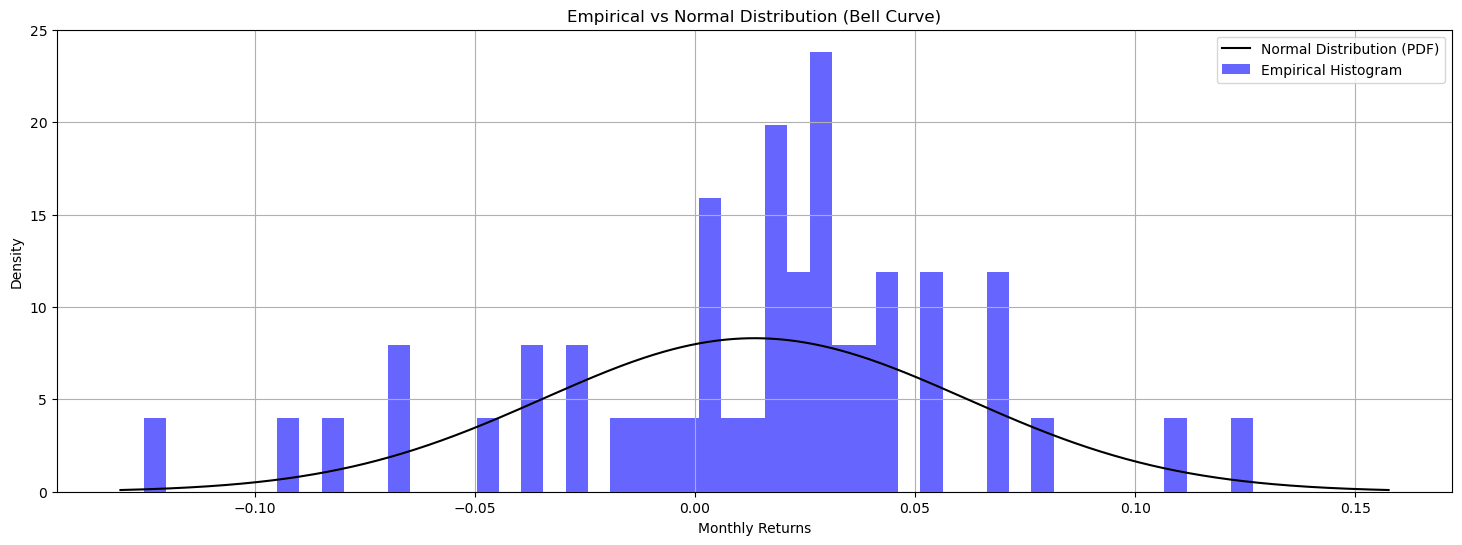

In [9]:
# plotting histogram vs bell curve(PDF)

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)

# theoretical pdf for normal dist
pdf = stats.norm.pdf(x, mu, sigma)

fig = plt.figure(figsize=(18, 6))
plt.plot(x, pdf, "k-", label="Normal Distribution (PDF)")
plt.hist(rets_array, bins=50, density=True, alpha=0.6, color="blue", label="Empirical Histogram")
plt.title("Empirical vs Normal Distribution (Bell Curve)")
plt.xlabel("Monthly Returns")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()


In [10]:
stats. kstest(rets_array, 'norm', args = (mu, sigma), mode = 'exact')

KstestResult(statistic=0.13062666203148776, pvalue=0.331640766005283, statistic_location=0.0027, statistic_sign=-1)

## The Hypothesis test is:


            

$$
H_{0}: P = P_{0}, \quad H_{A}: P \neq P_{0}
$$


#  Conclusion

The Kolmogorov Statistic is 0.1306 < 0.19(KS critical value for n=50, alpha=0.5 is 0.19).

The p-value is 0.3316 which is higher than 0.05. 

Because of this we fail to reject the null hypothesis. The empirical distribution is likely a normal distribution.
